In [104]:
import pandas as pd
import numpy as np

#from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc

from sklearn import tree
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt

from sklearn import metrics
import seaborn as sns

In [4]:
data=pd.read_csv('dataset.csv')
data

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.730000,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.420000,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.950000,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.640000,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,75.0,23.060250,0,Caucasian,M,177.8,Floor,...,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular,NaN,0
91709,66119,13486,121,56.0,47.179671,0,Caucasian,F,183.0,Floor,...,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
91710,8981,58179,195,48.0,27.236914,0,Caucasian,M,170.2,Accident & Emergency,...,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
91711,33776,120598,66,NaN,23.297481,0,Caucasian,F,154.9,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0


In [5]:
data.shape

(91713, 85)

In [8]:
data.isna().sum()

encounter_id                       0
patient_id                         0
hospital_id                        0
age                             4228
bmi                             3429
                               ...  
solid_tumor_with_metastasis      715
apache_3j_bodysystem            1662
apache_2_bodysystem             1662
Unnamed: 83                    91713
hospital_death                     0
Length: 85, dtype: int64

In [4]:
data.nunique()


encounter_id                   91713
patient_id                     91713
hospital_id                      147
age                               74
bmi                            34888
                               ...  
solid_tumor_with_metastasis        2
apache_3j_bodysystem              11
apache_2_bodysystem               10
Unnamed: 83                        0
hospital_death                     2
Length: 85, dtype: int64

In [9]:
target_variable=data["hospital_death"]

In [10]:
data.drop(["Unnamed: 83"],inplace=True,axis=1)

In [11]:
data.drop(["hospital_death"],inplace=True,axis=1)

In [12]:
data

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,68.0,22.730000,0,Caucasian,M,180.3,Floor,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,77.0,27.420000,0,Caucasian,F,160.0,Floor,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,25.0,31.950000,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,81.0,22.640000,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,75.0,23.060250,0,Caucasian,M,177.8,Floor,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular
91709,66119,13486,121,56.0,47.179671,0,Caucasian,F,183.0,Floor,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
91710,8981,58179,195,48.0,27.236914,0,Caucasian,M,170.2,Accident & Emergency,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
91711,33776,120598,66,NaN,23.297481,0,Caucasian,F,154.9,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory


In [13]:
data.set_index("patient_id", drop=True, append=False, inplace=True, verify_integrity=False)

In [14]:
data.sort_index(axis=0,level=None,ascending=True,inplace=True)

In [15]:
data.head(30)

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
patient_id,,,,,,,,,,,,,,,,,,,,,
1,93505,55,53.0,25.925926,0,Caucasian,M,180.0,Accident & Emergency,391,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
2,106180,182,37.0,51.752881,0,African American,F,152.4,Accident & Emergency,506,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
3,53841,103,69.0,26.272919,0,NaN,M,167.6,Accident & Emergency,798,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,12193,70,58.0,29.208836,0,Caucasian,M,185.4,Accident & Emergency,434,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
5,76221,70,77.0,20.601183,0,Caucasian,F,162.5,Accident & Emergency,464,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
6,82397,118,65.0,23.470015,1,Caucasian,M,172.7,Operating Room / Recovery,92,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Undefined diagnoses
7,74944,199,66.0,24.408815,0,African American,M,172.7,Operating Room / Recovery,468,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
8,112171,136,80.0,30.851890,0,Caucasian,M,175.2,Floor,374,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
9,8853,15,75.0,26.589749,0,Caucasian,F,162.6,Accident & Emergency,878,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular


In [16]:
data.isnull().any()

encounter_id                   False
hospital_id                    False
age                             True
bmi                             True
elective_surgery               False
                               ...  
leukemia                        True
lymphoma                        True
solid_tumor_with_metastasis     True
apache_3j_bodysystem            True
apache_2_bodysystem             True
Length: 82, dtype: bool

In [17]:
data.isna().sum()


encounter_id                      0
hospital_id                       0
age                            4228
bmi                            3429
elective_surgery                  0
                               ... 
leukemia                        715
lymphoma                        715
solid_tumor_with_metastasis     715
apache_3j_bodysystem           1662
apache_2_bodysystem            1662
Length: 82, dtype: int64

In [14]:
data

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
patient_id,,,,,,,,,,,,,,,,,,,,,
1,93505,55,53.0,25.925926,0,Caucasian,M,180.0,Accident & Emergency,391,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
2,106180,182,37.0,51.752881,0,African American,F,152.4,Accident & Emergency,506,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
3,53841,103,69.0,26.272919,0,NaN,M,167.6,Accident & Emergency,798,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,12193,70,58.0,29.208836,0,Caucasian,M,185.4,Accident & Emergency,434,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
5,76221,70,77.0,20.601183,0,Caucasian,F,162.5,Accident & Emergency,464,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131045,129406,49,22.0,21.668411,1,Caucasian,F,177.8,Operating Room / Recovery,888,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Gynecological,Renal/Genitourinary
131047,41957,103,74.0,NaN,1,Other/Unknown,M,NaN,Operating Room / Recovery,798,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
131048,6829,19,32.0,23.554688,0,Caucasian,F,160.0,Accident & Emergency,646,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic


In [42]:
Num=[]
for col in data.columns:
    if (data[col].dtype==int)or (data[col].dtype==float):
        Num.append(col)
print (Num)

['age', 'bmi', 'height', 'pre_icu_los_days', 'weight', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'arf_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'heart_rate_apache', 'intubated_apache', 'map_apache', 'resprate_apache', 'temp_apache', 'ventilated_apache', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'd1_temp_max', 'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_min', 'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min', 'h1_heartrate_max', 'h1_heartrate_min', 'h1_mbp_max', 'h1_mbp_min', 'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min', 'h1_resprate_max', 'h1_resprate_min', 'h1_spo2_max', 'h1_spo2_min', 'h1_sysbp_max', '

In [43]:
for col in data.columns:
    if col in Num :
        data[col].fillna(data[col].mean(), inplace=True)

In [44]:
cat=[]
for col in data.columns:
    if  (data[col].dtype==object):
        cat.append(col)
print (cat)


['ethnicity', 'gender', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'apache_3j_bodysystem', 'apache_2_bodysystem']


In [29]:
#if col in Num :
        #data[col].fillna(data[col].mode(), inplace=True)

In [46]:
for col in data.columns:
    if col in cat:
        data[col].fillna(data[col].mode(),inplace=True)

In [47]:
data.isnull().sum()

encounter_id                      0
hospital_id                       0
age                               0
bmi                               0
elective_surgery                  0
                               ... 
leukemia                          0
lymphoma                          0
solid_tumor_with_metastasis       0
apache_3j_bodysystem           1662
apache_2_bodysystem            1662
Length: 82, dtype: int64

In [48]:
data.isnull().any()

encounter_id                   False
hospital_id                    False
age                            False
bmi                            False
elective_surgery               False
                               ...  
leukemia                       False
lymphoma                       False
solid_tumor_with_metastasis    False
apache_3j_bodysystem            True
apache_2_bodysystem             True
Length: 82, dtype: bool

In [21]:
data

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
patient_id,,,,,,,,,,,,,,,,,,,,,
1,93505,55,53.0,25.925926,0,Caucasian,M,180.000000,Accident & Emergency,391,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
2,106180,182,37.0,51.752881,0,African American,F,152.400000,Accident & Emergency,506,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
3,53841,103,69.0,26.272919,0,NaN,M,167.600000,Accident & Emergency,798,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,12193,70,58.0,29.208836,0,Caucasian,M,185.400000,Accident & Emergency,434,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
5,76221,70,77.0,20.601183,0,Caucasian,F,162.500000,Accident & Emergency,464,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131045,129406,49,22.0,21.668411,1,Caucasian,F,177.800000,Operating Room / Recovery,888,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Gynecological,Renal/Genitourinary
131047,41957,103,74.0,29.185818,1,Other/Unknown,M,169.641588,Operating Room / Recovery,798,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
131048,6829,19,32.0,23.554688,0,Caucasian,F,160.000000,Accident & Emergency,646,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic


In [49]:
data_num=pd.DataFrame(Num)

In [50]:
data.isnull().any()

encounter_id                   False
hospital_id                    False
age                            False
bmi                            False
elective_surgery               False
                               ...  
leukemia                       False
lymphoma                       False
solid_tumor_with_metastasis    False
apache_3j_bodysystem            True
apache_2_bodysystem             True
Length: 82, dtype: bool

In [41]:
data.dtypes

encounter_id                     int64
hospital_id                      int64
age                            float64
bmi                            float64
elective_surgery                 int64
                                ...   
leukemia                       float64
lymphoma                       float64
solid_tumor_with_metastasis    float64
apache_3j_bodysystem            object
apache_2_bodysystem             object
Length: 82, dtype: object

In [24]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
data_cat_encoded=pd.get_dummies(cat,drop_first=True)
data_cat_encoded

,apache_3j_bodysystem,ethnicity,gender,icu_admit_source,icu_stay_type,icu_type
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,0,1,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1
5,1,0,0,0,0,0
6,0,0,0,0,0,0


In [51]:
target_variable.isnull().sum()

0

In [52]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in list(data.columns):
    if data[col].dtype == object:
        print("Column Name: \t\t", col)
        print("Unique Values: \t\t", list(data[col].unique()) )
        print("Length: \t\t", len(data[col].unique()))
        
        # Uncomment this if you want certain columns to be categorical 
        #choice = int(input("Do you want to encode it? (1/0) \t"))
        choice = 1
        
        # 1-> Yes
        # other value -> No
        if choice == 1:
            data[col]= le.fit_transform(data[col])
            print("Encoding Done Sucessfully :) ")
        else:
             print("Encoding Rejected :( ")
        print()


Column Name: 		 ethnicity
Unique Values: 		 ['Caucasian', 'African American', nan, 'Hispanic', 'Asian', 'Other/Unknown', 'Native American']
Length: 		 7
Encoding Done Sucessfully :) 

Column Name: 		 gender
Unique Values: 		 ['M', 'F', nan]
Length: 		 3
Encoding Done Sucessfully :) 

Column Name: 		 icu_admit_source
Unique Values: 		 ['Accident & Emergency', 'Operating Room / Recovery', 'Floor', 'Other ICU', 'Other Hospital', nan]
Length: 		 6
Encoding Done Sucessfully :) 

Column Name: 		 icu_stay_type
Unique Values: 		 ['admit', 'transfer', 'readmit']
Length: 		 3
Encoding Done Sucessfully :) 

Column Name: 		 icu_type
Unique Values: 		 ['CSICU', 'MICU', 'Med-Surg ICU', 'CCU-CTICU', 'CTICU', 'Neuro ICU', 'SICU', 'Cardiac ICU']
Length: 		 8
Encoding Done Sucessfully :) 

Column Name: 		 apache_3j_bodysystem
Unique Values: 		 ['Cardiovascular', 'Respiratory', 'Metabolic', 'Neurological', 'Sepsis', 'Gastrointestinal', 'Genitourinary', 'Musculoskeletal/Skin', 'Trauma', nan, 'Hematologica

In [53]:
data_cat=data.select_dtypes(include=['object'])

In [54]:
data_cat

""
patient_id
1
2
3
4
5
...
131045
131047
131048


In [55]:
data["icu_admit_source"]

patient_id
1         0
2         0
3         0
4         0
5         0
         ..
131045    2
131047    2
131048    0
131049    1
131051    0
Name: icu_admit_source, Length: 91713, dtype: int32

In [56]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, target_variable, test_size=0.2, random_state=25)

In [31]:
x_train.columns

Index(['encounter_id', 'hospital_id', 'age', 'bmi', 'elective_surgery',
       'ethnicity', 'gender', 'height', 'icu_admit_source', 'icu_id',
       'icu_stay_type', 'icu_type', 'pre_icu_los_days', 'weight',
       'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative',
       'arf_apache', 'gcs_eyes_apache', 'gcs_motor_apache',
       'gcs_unable_apache', 'gcs_verbal_apache', 'heart_rate_apache',
       'intubated_apache', 'map_apache', 'resprate_apache', 'temp_apache',
       'ventilated_apache', 'd1_diasbp_max', 'd1_diasbp_min',
       'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min',
       'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min',
       'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max',
       'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max',
       'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min',
       'd1_temp_max', 'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_min',
       '

In [32]:
x_test.columns

Index(['encounter_id', 'hospital_id', 'age', 'bmi', 'elective_surgery',
       'ethnicity', 'gender', 'height', 'icu_admit_source', 'icu_id',
       'icu_stay_type', 'icu_type', 'pre_icu_los_days', 'weight',
       'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative',
       'arf_apache', 'gcs_eyes_apache', 'gcs_motor_apache',
       'gcs_unable_apache', 'gcs_verbal_apache', 'heart_rate_apache',
       'intubated_apache', 'map_apache', 'resprate_apache', 'temp_apache',
       'ventilated_apache', 'd1_diasbp_max', 'd1_diasbp_min',
       'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min',
       'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min',
       'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max',
       'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max',
       'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min',
       'd1_temp_max', 'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_min',
       '

In [33]:
x_train

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
patient_id,,,,,,,,,,,,,,,,,,,,,
14094,21775,77,58.0,29.185818,1,2,1,177.80,2,87,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,6
9681,45451,70,60.0,34.565599,0,2,1,167.00,2,464,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
119200,73236,118,70.0,37.238461,0,0,0,154.90,0,99,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1
76221,113985,107,82.0,15.709343,0,2,0,170.00,0,486,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0
114271,130013,10,49.0,21.800703,0,2,1,162.56,0,428,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48602,22043,13,54.0,41.250749,0,0,1,190.50,2,708,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
51136,60550,118,39.0,37.070907,0,0,0,152.40,2,85,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
9505,82431,79,65.0,29.714286,0,2,1,175.00,0,337,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5,3


In [58]:
x_train.shape

(73370, 82)

In [59]:
x_test

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
patient_id,,,,,,,,,,,,,,,,,,,,,
40764,59606,92,36.000000,21.150223,0,5,1,185.4,0,707,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,4
57112,28937,37,62.309516,27.590125,0,2,1,167.6,1,685,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0
67707,35580,5,72.000000,27.900056,1,3,0,152.4,1,261,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
93058,83818,185,85.000000,29.173948,1,2,0,154.9,2,687,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
29847,86465,99,88.000000,28.817405,0,2,1,177.8,1,514,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100646,98454,19,67.000000,24.804688,0,2,0,160.0,0,653,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,1
13482,92647,39,65.000000,29.224195,1,2,0,156.0,2,619,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
117005,129392,176,36.000000,45.529710,1,2,1,185.4,2,611,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,5


In [60]:
x_test.shape

(18343, 82)

In [61]:
y_train

9844     0
6745     0
83386    0
53362    0
79949    1
        ..
33943    0
35702    0
6618     0
90430    0
29828    0
Name: hospital_death, Length: 73370, dtype: int64

In [62]:
y_test

28465    0
39989    0
47424    0
65143    1
20843    0
        ..
70411    0
9424     0
81853    0
12802    0
27110    0
Name: hospital_death, Length: 18343, dtype: int64

In [63]:
y_train.shape

(73370,)

In [38]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(random_state=42)

rfe_RF=RFE(RF,n_features_to_select=55,verbose=21)

rfe_RF.fit(x_train,y_train)
names=x_train.columns.tolist()
b=rfe_RF.ranking_

a=pd.DataFrame(sorted(list(map(lambda x,y: (x,y),b,names))),columns=['rank','features'])
a.to_csv('feature_selection.csv')

RFE_selected=a['features'][a['rank']==1]

Fitting estimator with 82 features.
Fitting estimator with 81 features.
Fitting estimator with 80 features.
Fitting estimator with 79 features.
Fitting estimator with 78 features.
Fitting estimator with 77 features.
Fitting estimator with 76 features.
Fitting estimator with 75 features.
Fitting estimator with 74 features.
Fitting estimator with 73 features.
Fitting estimator with 72 features.
Fitting estimator with 71 features.
Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 features.
Fitting estimator with 66 features.
Fitting estimator with 65 features.
Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.


In [39]:
a

,rank,features
0,1,age
1,1,apache_2_diagnosis
2,1,apache_3j_diagnosis
3,1,apache_4a_hospital_death_prob
4,1,bmi
...,...,...
77,24,arf_apache
78,25,gcs_unable_apache
79,26,leukemia
80,27,lymphoma


In [40]:
RFE_selected

0                               age
1                apache_2_diagnosis
2               apache_3j_diagnosis
3     apache_4a_hospital_death_prob
4                               bmi
5                     d1_diasbp_max
6                     d1_diasbp_min
7         d1_diasbp_noninvasive_max
8         d1_diasbp_noninvasive_min
9                    d1_glucose_max
10                   d1_glucose_min
11                 d1_heartrate_max
12                 d1_heartrate_min
13                       d1_mbp_max
14                       d1_mbp_min
15           d1_mbp_noninvasive_max
16           d1_mbp_noninvasive_min
17                 d1_potassium_max
18                 d1_potassium_min
19                  d1_resprate_max
20                  d1_resprate_min
21                      d1_spo2_min
22                     d1_sysbp_max
23                     d1_sysbp_min
24         d1_sysbp_noninvasive_max
25         d1_sysbp_noninvasive_min
26                      d1_temp_max
27                      d1_t

In [41]:
x_train.head()

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
patient_id,,,,,,,,,,,,,,,,,,,,,
14094,21775,77,58.0,29.185818,1,2,1,177.80,2,87,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,6
9681,45451,70,60.0,34.565599,0,2,1,167.00,2,464,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
119200,73236,118,70.0,37.238461,0,0,0,154.90,0,99,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1
76221,113985,107,82.0,15.709343,0,2,0,170.00,0,486,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0
114271,130013,10,49.0,21.800703,0,2,1,162.56,0,428,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,5


In [42]:
x_test.head()

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
patient_id,,,,,,,,,,,,,,,,,,,,,
40764,59606,92,36.000000,21.150223,0,5,1,185.4,0,707,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,4
57112,28937,37,62.309516,27.590125,0,2,1,167.6,1,685,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0
67707,35580,5,72.000000,27.900056,1,3,0,152.4,1,261,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
93058,83818,185,85.000000,29.173948,1,2,0,154.9,2,687,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
29847,86465,99,88.000000,28.817405,0,2,1,177.8,1,514,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [43]:
x_train=x_train[RFE_selected]

In [44]:
x_test=x_test[RFE_selected]

In [45]:
x_train.head()

,age,apache_2_diagnosis,apache_3j_diagnosis,apache_4a_hospital_death_prob,bmi,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_glucose_max,...,h1_sysbp_noninvasive_min,heart_rate_apache,height,hospital_id,icu_id,map_apache,pre_icu_los_days,resprate_apache,temp_apache,weight
patient_id,,,,,,,,,,,,,,,,,,,,,
14094,58.0,209.0,1302.02,0.086787,29.185818,60.0,56.0,60.0,56.0,172.0,...,116.549625,88.0,177.80,77,87,141.0,0.003472,60.0,35.9,84.02834
9681,60.0,302.0,111.01,0.050000,34.565599,82.0,56.0,70.0,70.0,193.0,...,115.000000,120.0,167.00,70,464,62.0,0.379167,32.0,36.6,96.40000
119200,70.0,304.0,311.01,0.030000,37.238461,92.0,58.0,92.0,58.0,191.0,...,154.000000,62.0,154.90,118,99,150.0,0.096528,37.0,36.4,89.35000
76221,82.0,113.0,501.05,0.190000,15.709343,67.0,38.0,67.0,38.0,239.0,...,53.000000,134.0,170.00,107,486,40.0,0.011806,59.0,36.1,45.40000
114271,49.0,305.0,901.03,0.040000,21.800703,109.0,63.0,109.0,63.0,94.0,...,97.000000,92.0,162.56,10,428,146.0,0.111806,45.0,35.9,57.61000


In [46]:
x_test.head()

,age,apache_2_diagnosis,apache_3j_diagnosis,apache_4a_hospital_death_prob,bmi,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_glucose_max,...,h1_sysbp_noninvasive_min,heart_rate_apache,height,hospital_id,icu_id,map_apache,pre_icu_los_days,resprate_apache,temp_apache,weight
patient_id,,,,,,,,,,,,,,,,,,,,,
40764,36.000000,301.0,403.01,0.086787,21.150223,87.0,63.0,87.0,63.0,96.0,...,146.0,52.0,185.4,92,707,66.0,0.219444,51.0,36.7,72.7
57112,62.309516,113.0,501.05,0.480000,27.590125,86.0,56.0,86.0,56.0,153.0,...,134.0,120.0,167.6,37,685,143.0,4.217361,43.0,36.8,77.5
67707,72.000000,214.0,1404.01,0.450000,27.900056,89.0,45.0,89.0,45.0,211.0,...,173.0,56.0,152.4,5,261,59.0,2.146528,14.0,35.7,64.8
93058,85.000000,213.0,1405.02,0.160000,29.173948,52.0,48.0,52.0,48.0,180.0,...,77.0,143.0,154.9,185,687,152.0,6.813194,57.0,35.7,70.0
29847,88.000000,114.0,102.01,0.610000,28.817405,120.0,47.0,120.0,47.0,224.0,...,135.0,122.0,177.8,99,514,42.0,7.368750,6.0,38.7,91.1


In [70]:
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier()
RF_model.fit(x_train,y_train)


RandomForestClassifier()

In [71]:
RF_model

RandomForestClassifier()

In [72]:
x_test

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
patient_id,,,,,,,,,,,,,,,,,,,,,
40764,59606,92,36.000000,21.150223,0,5,1,185.4,0,707,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,4
57112,28937,37,62.309516,27.590125,0,2,1,167.6,1,685,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0
67707,35580,5,72.000000,27.900056,1,3,0,152.4,1,261,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
93058,83818,185,85.000000,29.173948,1,2,0,154.9,2,687,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
29847,86465,99,88.000000,28.817405,0,2,1,177.8,1,514,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100646,98454,19,67.000000,24.804688,0,2,0,160.0,0,653,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,1
13482,92647,39,65.000000,29.224195,1,2,0,156.0,2,619,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
117005,129392,176,36.000000,45.529710,1,2,1,185.4,2,611,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,5


In [73]:
y_test

28465    0
39989    0
47424    0
65143    1
20843    0
        ..
70411    0
9424     0
81853    0
12802    0
27110    0
Name: hospital_death, Length: 18343, dtype: int64

In [74]:
pred=RF_model.predict(x_test)

In [75]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [76]:
out_data=pd.DataFrame({'true':y_test,'model_predicted':pred})

In [77]:
preds=RF_model.predict(x_test)

In [78]:
#from sklearn.metrics import accuracy_score
#accuracy_test=accuracy_score(y_test, preds)

In [79]:
#accuracy_test

In [80]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [81]:
hospital_death=DecisionTreeClassifier(max_leaf_nodes=80,random_state=20)

In [82]:
hospital_death.fit(x_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=80, random_state=20)

In [83]:
y_predicted=hospital_death.predict(x_test)

In [112]:
z=accuracy_score(y_test,y_predicted)*100
z

91.27732650057241

In [85]:
confusion_matrix(y_test,y_predicted)

array([[16739,    23],
       [ 1577,     4]], dtype=int64)

In [86]:
#knn

In [87]:
from sklearn import metrics


In [88]:
from sklearn.neighbors import KNeighborsClassifier

In [89]:
b=KNeighborsClassifier(n_neighbors=1)
b

KNeighborsClassifier(n_neighbors=1)

In [90]:
KNN=b.fit(x_train,y_train)
KNN

KNeighborsClassifier(n_neighbors=1)

In [113]:
PREDICTION=KNN.predict(x_test)

In [114]:
print(metrics.classification_report(y_test,PREDICTION))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     16762
           1       0.08      0.09      0.09      1581

    accuracy                           0.84     18343
   macro avg       0.50      0.50      0.50     18343
weighted avg       0.84      0.84      0.84     18343



In [115]:
print(metrics.confusion_matrix(y_test,PREDICTION))

[[15285  1477]
 [ 1444   137]]


In [126]:
q=accuracy_score(y_test,PREDICTION)*100
q

84.07566919260753

In [94]:
from sklearn.model_selection import GridSearchCV

In [95]:
param_grid = {"n_estimators" : [90,180],
              "max_depth" : [2,3],
              "min_samples_leaf" : [2, 4],
              "max_features" : [0.4,0.5]
             }

In [96]:
RF_model=RandomForestClassifier() #estimator
clf = GridSearchCV(RF_model,param_grid,cv=3)
clf.fit(x_train,y_train)
clf.best_estimator_

RandomForestClassifier(max_depth=2, max_features=0.4, min_samples_leaf=2,
                       n_estimators=90)

In [97]:
clf.best_estimator_

RandomForestClassifier(max_depth=2, max_features=0.4, min_samples_leaf=2,
                       n_estimators=90)

In [98]:
preds=clf.best_estimator_.predict(x_test)

#black box Evaluation metrics
from sklearn.metrics import accuracy_score
accuracy_test=accuracy_score(y_test, preds)


In [121]:
w=accuracy_test*100
w

91.38090824837812

In [100]:
confusion_matrix(y_test,preds)

array([[16762,     0],
       [ 1581,     0]], dtype=int64)

In [109]:
print(metrics.classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     16762
           1       0.00      0.00      0.00      1581

    accuracy                           0.91     18343
   macro avg       0.46      0.50      0.48     18343
weighted avg       0.84      0.91      0.87     18343



C:\Users\91906\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91906\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91906\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [102]:
import seaborn as sns

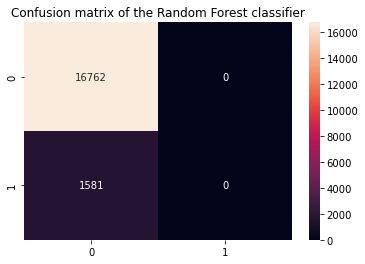

In [103]:
cm_r = confusion_matrix(y_test,preds )
plt.title('Confusion matrix of the Random Forest classifier')
sns.heatmap(cm_r,annot=True,fmt="d")
plt.show()

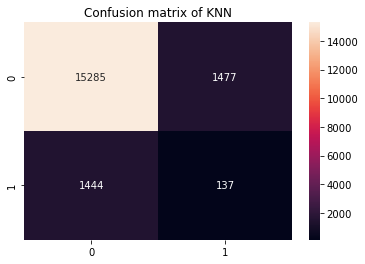

In [105]:
cm_r = confusion_matrix(y_test, PREDICTION)
plt.title('Confusion matrix of KNN')
sns.heatmap(cm_r,annot=True,fmt="d")
plt.show()

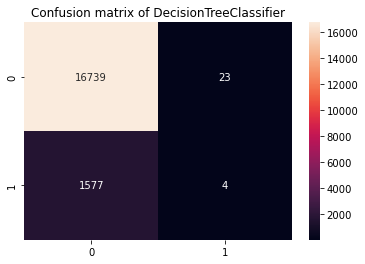

In [107]:
cm_r = confusion_matrix(y_test,y_predicted )
plt.title('Confusion matrix of DecisionTreeClassifier')
sns.heatmap(cm_r,annot=True,fmt="d")
plt.show()

In [127]:
data1=[['DecisionTreeClassifier',z],['KNeighborsClassifier',q],['RandomForestClassifier',w]]

In [128]:
pd.DataFrame(data1,columns=['name of model','accuracy'])

,name of model,accuracy
0,DecisionTreeClassifier,91.277327
1,KNeighborsClassifier,84.075669
2,RandomForestClassifier,91.380908
